In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Dataset - https://www.kaggle.com/itsahmad/indoor-scenes-cvpr-2019

In [2]:
file = Path("./indoorscenes/Images")
File_Path = list(file.glob(r"**/*.jpg"))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],File_Path))

File_Path = pd.Series(File_Path).astype(str)
Labels = pd.Series(Labels)
df = pd.concat([File_Path,Labels],axis=1)
df.columns = ['image', 'label']



print('-'*70)
print(df.head())

print('='*70)
print(df["label"].value_counts())
print('-'*70)

----------------------------------------------------------------------
                                               image     label
0         indoorscenes/Images/gameroom/Gameroom7.jpg  gameroom
1   indoorscenes/Images/gameroom/salle_de_jeux33.jpg  gameroom
2  indoorscenes/Images/gameroom/AT_01_6B_5479_25_...  gameroom
3  indoorscenes/Images/gameroom/Falcon_CrestPool_...  gameroom
4  indoorscenes/Images/gameroom/OR_99_3_4797_22_l...  gameroom
kitchen           732
livingroom        706
bedroom           662
airport_inside    608
bar               604
                 ... 
inside_bus        102
greenhouse        101
hospitalroom      101
elevator          101
lobby             101
Name: label, Length: 67, dtype: int64
----------------------------------------------------------------------


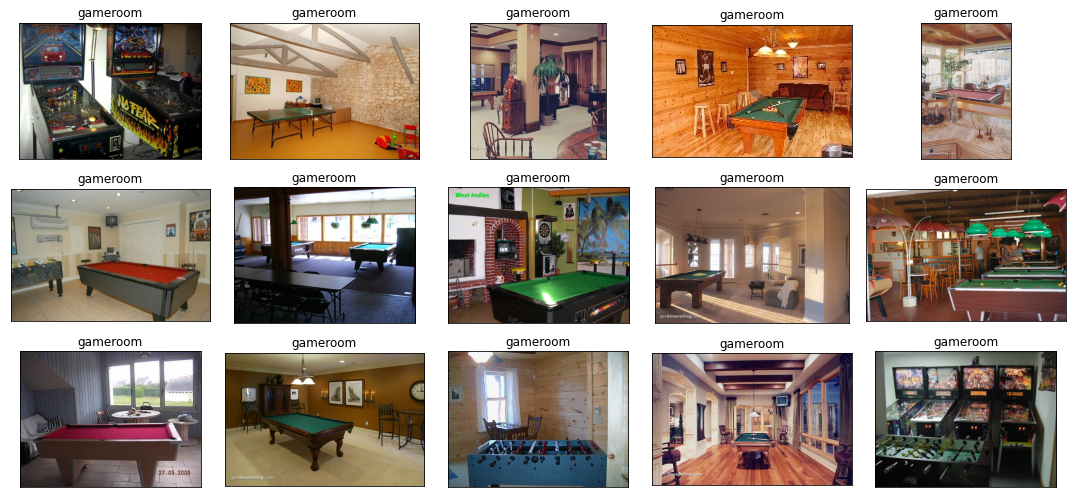

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax ,in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.tight_layout()
plt.show()

In [4]:
Train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

train_set, val_set = train_test_split(Train_set, test_size= 0.2, random_state = 42)

In [5]:
print(train_set.shape)
print(test_set.shape)
print(val_set.shape)

(9992, 2)
(3123, 2)
(2498, 2)


In [6]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5, 
    )

In [7]:
train = img_gen.flow_from_dataframe(dataframe = train_set,
    x_col = 'image',
    y_col ='label', 
    target_size = (180, 180),
    color_mode = 'rgb',
    class_mode = 'categorical',                                   
    batch_size = 32,
    shuffle = False 
)



test = img_gen.flow_from_dataframe(dataframe = test_set,
    x_col = 'image', 
    y_col ='label', 
    target_size =(180, 180),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)



val = img_gen.flow_from_dataframe(dataframe = val_set,
    x_col = 'image', 
    y_col ='label', 
    target_size =(180, 180),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)

Found 9992 validated image filenames belonging to 67 classes.
Found 3123 validated image filenames belonging to 67 classes.
Found 2498 validated image filenames belonging to 67 classes.


In [8]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = [180, 180, 3])) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.8))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.8))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=150, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=100, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=67, activation='softmax'))

print(cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 59168)             0

In [9]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = cnn.fit(train, validation_data = val, epochs=50)

Epoch 1/50
313/313 [==============================] - 337s 1s/step - loss: 0.1443 - accuracy: 0.0448 - val_loss: 0.1171 - val_accuracy: 0.0809
Epoch 2/50
313/313 [==============================] - 346s 1s/step - loss: 0.0727 - accuracy: 0.0836 - val_loss: 0.1037 - val_accuracy: 0.0929
Epoch 3/50
313/313 [==============================] - 337s 1s/step - loss: 0.0703 - accuracy: 0.0973 - val_loss: 0.0913 - val_accuracy: 0.0953
Epoch 4/50
313/313 [==============================] - 344s 1s/step - loss: 0.0685 - accuracy: 0.1161 - val_loss: 0.0797 - val_accuracy: 0.1077
Epoch 5/50
313/313 [==============================] - 395s 1s/step - loss: 0.0675 - accuracy: 0.1241 - val_loss: 0.0709 - val_accuracy: 0.1317
Epoch 6/50
313/313 [==============================] - 364s 1s/step - loss: 0.0658 - accuracy: 0.1449 - val_loss: 0.0720 - val_accuracy: 0.1477
Epoch 7/50
313/313 [==============================] - 330s 1s/step - loss: 0.0655 - accuracy: 0.1558 - val_loss: 0.0690 - val_accuracy: 0.1461

Text(0.5, 1.0, 'Training and Validation Loss')

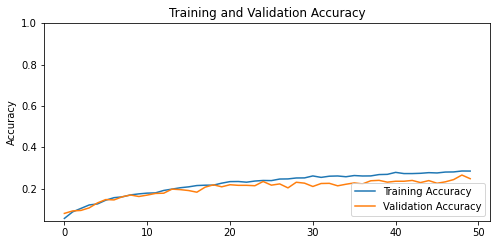

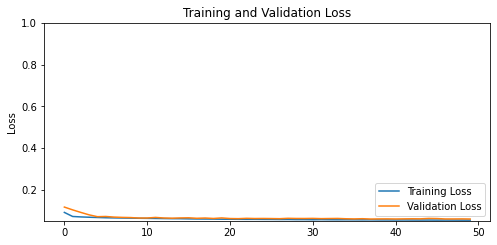

In [11]:
acc = history.history['accuracy'] # get history report of the model

val_acc = history.history['val_accuracy'] # get history of the validation set

loss = history.history['loss'] #get the history of the lossses recorded on the train set
val_loss = history.history['val_loss'] #get the history of the lossses recorded on the validation set

plt.figure(figsize=(8, 8)) # set figure size for the plot generated
plt.subplot(2, 1, 1) # a sup plot with 2 rows and 1 column

plt.plot(acc, label='Training Accuracy') #plot accuracy curve for each train run
plt.plot(val_acc, label='Validation Accuracy') #plot accuracy curve for each validation run

plt.legend(loc='lower right')
plt.ylabel('Accuracy') #label name for y axis
plt.ylim([min(plt.ylim()),1]) #set limit for y axis
plt.title('Training and Validation Accuracy')







plt.figure(figsize=(8, 8)) # set figure size for the plot generated
plt.subplot(2, 1, 1) # a sup plot with 2 rows and 1 column

plt.plot(loss, label='Training Loss') #plot loss curve for each train run
plt.plot(val_loss, label='Validation Loss') #plot loss curve for each validation run

plt.legend(loc='lower right')
plt.ylabel('Loss') #label name for y axis
plt.ylim([min(plt.ylim()),1]) #set limit for y axis
plt.title('Training and Validation Loss')